In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time, sys
sys.path.append('/Users/AbSir/Library/CloudStorage/GoogleDrive-asharda@vols.utk.edu/My Drive/xem2')
from common_functions import jra_nprat, NZ_target, fitit
import warnings
from scipy.integrate import simps
from scipy.integrate import quad
import pandas as pd
from summary_dictionary import ryan_data, nadia_data
from abhyuday_data import abhyuday_data
from scipy.interpolate import interp1d
import scipy.constants as const
from scipy.constants import physical_constants

target = 'h2'
N, Z = NZ_target(target)
A = N + Z
qs = 10 # Momentum transfer squared
mp = physical_constants['proton mass energy equivalent in MeV'][0] / 1000 # Proton mass in GeV
hbar_c = physical_constants['reduced Planck constant times c in MeV fm'][0]
# print(f"\hbar c in MeV*fm: {hbar_c}")
n_mass = physical_constants['neutron mass energy equivalent in MeV'][0]
# print(f"Mass of neutron in MeV/c^2: {n_mass}")
p_mass = physical_constants['proton mass energy equivalent in MeV'][0]
A

2

# Reading the 1 body density file

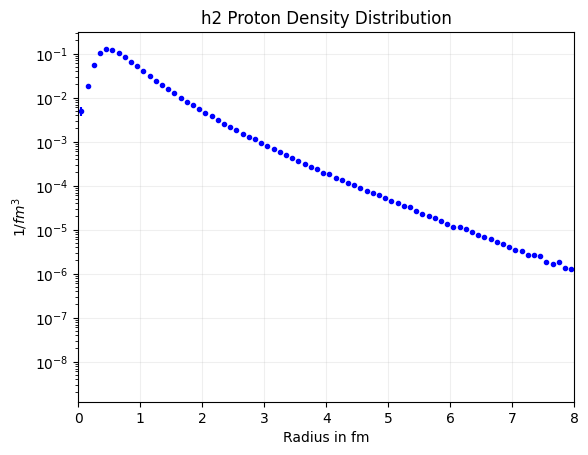

In [3]:
file_path = f'density/{target}.density'
R_list = []
RHORP_list = []
DRHORP_list = []
RHORN_list = []
DRHORN_list = []
warnings.filterwarnings('ignore')

def process_data(file_path):
    # Flag to indicate parsing should start
    start_parsing = False
    
    # Open the file for reading
    with open(file_path, 'r') as file:
        for line in file:
            # Check if the current line is the delimiter
            if '*****' in line:
                start_parsing = True
                continue  # Skip the delimiter line
            
            # Start processing lines after the delimiter
            if start_parsing:
                # Split the line into columns based on whitespace
                columns = line.split()
                
                # Check if the line has the expected columns
                if len(columns) == 5:
                    # Convert R and RHORP to float, and DRHORP to float (handling scientific notation)
                    try:
                        R, RHORP, DRHORP, RHORN, DRHORN = float(columns[0]), float(columns[1]), float(columns[2]), float(columns[3]), float(columns[4])
                        R_list.append(R)
                        RHORP_list.append(RHORP)
                        DRHORP_list.append(DRHORP)
                        RHORN_list.append(RHORN)
                        DRHORN_list.append(DRHORN)
                        # print(columns)
                    except:
                        start_parsing = False
                        break
                elif len(columns) == 3:
                    try:
                        R, RHORP, DRHORP = float(columns[0]), float(columns[1]), float(columns[2])
                        R_list.append(R)
                        RHORP_list.append(RHORP)
                        DRHORP_list.append(DRHORP)
                        RHORN_list.append(RHORP)
                        DRHORN_list.append(DRHORP)
                    except:
                        start_parsing = False
                        break
                elif len(columns) == 4: # For deuterium only
                    try:
                        R, RHORP, DRHORP = float(columns[0]), float(columns[2]), float(columns[3])
                        R_list.append(R)
                        RHORP_list.append(RHORP)
                        DRHORP_list.append(DRHORP)
                        RHORN_list.append(RHORP)
                        DRHORN_list.append(DRHORP)
                    except:
                        start_parsing = False
                        break

    # Return the processed data
    # return R_array, RHORP_array, DRHORP_array, RHORN_array, DRHORN_array
    return R_list, RHORP_list, DRHORP_list, RHORN_list, DRHORN_list

R, RHORP, DRHORP, RHORN, DRHORN = process_data(file_path)

fig, ax = plt.subplots()
# Plot the data
ax.errorbar(R, RHORP, marker = 'o', yerr = DRHORP, color = 'b', markersize = 3, linestyle = 'None')
ax.set_xlabel('Radius in fm')
ax.set_ylabel(r'$1/fm^3$')
ax.set_yscale('log')
ax.set_xlim(0, 8)
ax.set_title(f'{target} Proton Density Distribution')
ax.grid(alpha = 0.2)
# fig.savefig(f'plots/{target}_density_{time.time():.0f}.pdf')

# Reading the 2 body density file

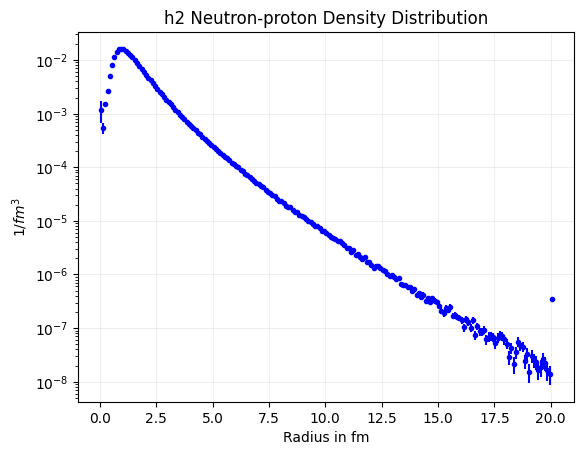

In [4]:
file_path = f'density2/{target}.density2'
RHORPP_list = []
RHORNP_list = []
RHORNN_list = []
R_list = []
DRHORPP_list = []
DRHORNP_list = []
DRHORNN_list = []

def process_tbd(file_path):
    # Flag to indicate parsing should start
    start_parsing = False
    
    # Open the file for reading
    with open(file_path, 'r') as file:
        for line in file:
            # Check if the current line is the delimiter
            if '*****' in line:
                start_parsing = True
                continue  # Skip the delimiter line
            
            # Start processing lines after the delimiter
            if start_parsing:
                # Split the line into columns based on whitespace
                columns = line.split()
                
                # Check if the line has the expected number of columns
                if len(columns) == 7:
                    # Convert R and RHORP to float, and DRHORP to float (handling scientific notation)
                    try:
                        R, RHORPP, DRHORPP, RHORNP, DRHORNP, RHORNN, DRHORNN = float(columns[0]), float(columns[1]), float(columns[2]), float(columns[3]), float(columns[4]), float(columns[5]), float(columns[6])
                        R_list.append(R)
                        RHORPP_list.append(RHORPP)
                        DRHORPP_list.append(DRHORPP)
                        RHORNP_list.append(RHORNP)
                        DRHORNP_list.append(DRHORNP)
                        RHORNN_list.append(RHORNN)
                        DRHORNN_list.append(DRHORNN)
                    except:
                        start_parsing = False
                        break
                elif len(columns) == 5:
                    try:
                        R, RHORPP, DRHORPP, RHORNP, DRHORNP = float(columns[0]), float(columns[1]), float(columns[2]), float(columns[3]), float(columns[4])
                        R_list.append(R)
                        RHORPP_list.append(RHORPP)
                        DRHORPP_list.append(DRHORPP)
                        RHORNP_list.append(RHORNP)
                        DRHORNP_list.append(DRHORNP)
                        RHORNN_list.append(RHORPP)
                        DRHORNN_list.append(DRHORPP)
                    except:
                        start_parsing = False
                        break
                elif len(columns) == 4:
                    try:
                        R, RHORNP, DRHORNP = float(columns[0]), float(columns[2]), float(columns[3])
                        R_list.append(R)
                        RHORPP_list.append(0)
                        DRHORPP_list.append(0)
                        RHORNP_list.append(RHORNP)
                        DRHORNP_list.append(DRHORNP)
                        RHORNN_list.append(0)
                        DRHORNN_list.append(0)
                    except:
                        start_parsing = False
                        break

    # Return the processed data
    return R_list, RHORPP_list, DRHORPP_list, RHORNP_list, DRHORNP_list, RHORNN_list, DRHORNN_list

R2, RHORPP, DRHORPP, RHORNP, DRHORNP, RHORNN, DRHORNN = process_tbd(file_path)

tbd_r = np.array(R2)
rhorpp_values = np.array(RHORPP)
rhorpn_values = np.array(RHORNP)
rhornn_values = np.array(RHORNN)

fig, ax = plt.subplots()
# Plot the data
ax.errorbar(R2, RHORNP, yerr = DRHORNP, marker = 'o', color = 'b', markersize = 3, linestyle = 'None')
ax.set_xlabel('Radius in fm')
ax.set_ylabel(r'$1/fm^3$')
ax.set_yscale('log')
# ax.set_xlim(0, 16)
ax.set_title(f'{target} Neutron-proton Density Distribution')
ax.grid(alpha = 0.2)
# fig.savefig(f'plots/{target}_2bodydensity_{time.time():.0f}.pdf')

# Reading the momentum file

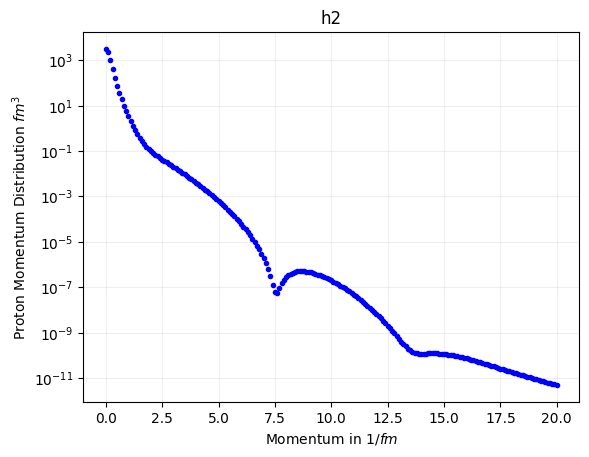

In [5]:
file_path = f'momentum/{target}.momentum'
K_list = []
RHOKN1_list = []
RHOKP1_list = []
DRHOKN1_list = []
DRHOKP1_list = []

def process_mom(file_path):
    # Flag to indicate parsing should start
    start_parsing = False
    
    # Open the file for reading
    with open(file_path, 'r') as file:
        for line in file:
            # Check if the current line is the delimiter
            if '*****' in line:
                start_parsing = True
                continue  # Skip the delimiter line
            
            # Start processing lines after the delimiter
            if start_parsing:
                # Split the line into columns based on whitespace
                columns = line.split()
                
                # Check if the line has the expected number of columns
                if len(columns) == 5:
                    # Convert R and RHORP to float, and DRHORP to float (handling scientific notation)
                    try:
                        K, RHOKN1, DRHOKN1, RHOKP1, DRHOKP1 = float(columns[0]), float(columns[1]), float(columns[2]), float(columns[3]), float(columns[4])
                        K_list.append(K)
                        RHOKN1_list.append(RHOKN1)
                        RHOKP1_list.append(RHOKP1)
                        DRHOKN1_list.append(DRHOKN1)
                        DRHOKP1_list.append(DRHOKP1)
                    except:
                        start_parsing = False
                        break
                if len(columns) == 3:
                    try:
                        K, RHOKP1, DRHOKP1 = float(columns[0]), float(columns[1]), float(columns[2])
                        K_list.append(K)
                        RHOKN1_list.append(RHOKP1)
                        RHOKP1_list.append(RHOKP1)
                        DRHOKN1_list.append(DRHOKP1)
                        DRHOKP1_list.append(DRHOKP1)
                    except:
                        start_parsing = False
                        break
                if len(columns) == 4: # For deuterium only
                    try:
                        K, RHOKP1 = float(columns[0]), float(columns[3])
                        K_list.append(K)
                        RHOKN1_list.append(RHOKP1)
                        RHOKP1_list.append(RHOKP1)
                        DRHOKN1_list.append(0) # deuterium file does not have error values
                        DRHOKP1_list.append(0)
                    except:
                        start_parsing = False
                        break

    # Return the processed data
    return K_list, RHOKN1_list, RHOKP1_list, DRHOKN1_list, DRHOKP1_list

K, RHOKN1, RHOKP1, DRHOKN1, DRHOKP1 = process_mom(file_path)

momentum = np.array(K)
rhokn1_values = np.array(RHOKN1)
rhokp1_values = np.array(RHOKP1)

fig, ax = plt.subplots()
# Plot the data
ax.errorbar(K, RHOKP1, yerr = DRHOKP1, marker = 'o', color = 'b', markersize = 3, linestyle = 'None')
ax.set_xlabel(r'Momentum in $1/fm$')
ax.set_ylabel(r'Proton Momentum Distribution $fm^3$')
ax.set_yscale('log')
ax.set_title(f'{target}')
ax.grid(alpha = 0.2)
# fig.savefig(f'plots/{target}_2bodydensity_{time.time():.0f}.pdf')

<h1 style="color:lightblue; text-align:center">Calculating average proton density (fig1)</h1>

\begin{equation}
    \langle\rho\rangle_p = \frac{\int \rho_p^2(r) r^2 dr}{\int \rho_p(r) r^2 dr}
\end{equation}

\begin{equation}
    \text{RMS Radii} = \sqrt{\frac{4 \pi \int \rho(r) r^4 \, dr}{N}}
\end{equation}

\begin{equation}
    N = 4 \pi \int \rho(r) r^2 \, dr
\end{equation}

In [6]:
# Convert lists to numpy arrays
r_values = np.array(R)
rhorp_values = np.array(RHORP)
rhorn_values = np.array(RHORN)

# Calculate the squared values for the numerator
rhorp_squared = rhorp_values**2
rhorn_squared = rhorn_values**2
print(len(rhorp_squared))
print(len(rhorn_squared))
print(len(r_values))

# Compute the integrals. The first argument is the function to integrate, the second argument is the integration variable in the form of an array
numerator = simps(rhorp_squared * r_values**2, r_values)
denominator = simps(rhorp_values * r_values**2, r_values)
rms = simps(rhorp_values * r_values**4, r_values)
normalization = 4 * np.pi * denominator
rms_radii = np.sqrt((4 * np.pi * rms) / normalization)

# Calculate the expectation value
expectation_value = numerator / denominator

print(f'The normalization constant is: {normalization:.4f}')
print(f'The RMS radius is: {rms_radii:.4f} fm')
print(f'The denominator is {denominator:.4f}')
print(f'The expectation value of the proton density for {target} is: {expectation_value:.4f} fm^3')

201
201
201
The normalization constant is: 0.9990
The RMS radius is: 1.9675 fm
The denominator is 0.0795
The expectation value of the proton density for h2 is: 0.0380 fm^3


<h2 style="color:lightblue; text-align:center">Calculating average neutron density (fig1)</h2>

In [7]:
numerator_n = simps(rhorn_squared * r_values**2, r_values)
denominator_n = simps(rhorn_values * r_values**2, r_values)
normalization_n = 4 * np.pi * denominator_n
expectation_value_n = numerator_n / denominator_n
if denominator_n == 0:
    expectation_value_n = expectation_value
print(f"The expectation value of the neutron density for {target} is: {expectation_value_n:.4f} fm^3")

The expectation value of the neutron density for h2 is: 0.0380 fm^3


<h2 style="color:lightblue; text-align:center">Calculating average density of nucleons as sampled by protons (fig1)</h1>


\begin{equation}
    \text{Numerator} = \int \rho_p^2(r) r^2 dr
\end{equation}

\begin{equation}
    \text{Denominator} = \int \rho_p(r) r^2 dr
\end{equation}

In [8]:
def integrand(r):
    return r**2 * rhorp_values * (rhorn_values + rhorp_values)

nume_sampled = 4 * np.pi * simps(integrand(r_values), r_values)

density_sampled = nume_sampled / normalization
fpdens = density_sampled
print(f"The average density of nucleons sampled by protons for {target} is: {density_sampled:.4f} fm^3")
y = 19
print(f"Column {y} in Ryan's summary file for {target} is {ryan_data[target][y-2]}")

The average density of nucleons sampled by protons for h2 is: 0.0760 fm^3
Column 19 in Ryan's summary file for h2 is 0.076


<h2 style="color:lightblue; text-align:center">Calculating average density of nucleons as sampled by neutrons (fig1)</h1>

In [9]:
def integrand(r):
    return r**2 * rhorn_values * (rhorn_values + rhorp_values)

nume_sampled = 4 * np.pi * simps(integrand(r_values), r_values)
density_sampled_n = nume_sampled / normalization_n
print(f"The average density of nucleons sampled by neutrons for {target} is: {density_sampled_n:.4f} fm^3")
fndens = density_sampled_n

The average density of nucleons sampled by neutrons for h2 is: 0.0760 fm^3


<h2 style="color:lightblue; text-align:center">Excluding scattered protons (fig1)</h1>

\begin{equation}
    \langle \rho ' \rangle ^p _p=\frac{4\pi\int [\rho _p(r)\times\frac{Z-1}{Z}+\rho _n(r)]\rho_p(r) r^2 dr}{4\pi\int \rho _p(r)r ^2 dr}
\end{equation}

In [10]:
def integrand(r):
    return r**2 * rhorp_values * (rhorp_values * ((normalization - 1) / normalization) + rhorn_values)

nume_excluded = 4 * np.pi * simps(integrand(r_values), r_values)

density_excluded = nume_excluded / normalization
print(f"The average density of nucleons sampled by protons excluding sampled proton for {target} is: {density_excluded:.4f} fm^3")

The average density of nucleons sampled by protons excluding sampled proton for h2 is: 0.0380 fm^3


<h2 style="color:lightblue; text-align:center">Excluding scattered neutrons (fig1)</h1>

In [11]:
def integrand(r):
    return r**2 * rhorn_values * (rhorn_values * ((normalization_n - 1) / normalization_n) + rhorp_values)

nume_excluded = 4 * np.pi * simps(integrand(r_values), r_values)
density_excluded_n = nume_excluded / normalization_n
print(f"The average density of nucleons sampled by neutrons excluding sampled neutron for {target} is: {density_excluded_n:.4f} fm^3")

The average density of nucleons sampled by neutrons excluding sampled neutron for h2 is: 0.0380 fm^3


# Values in figure 1 reproduced successfully --------------------------------------------------------

<h1 style="color:lightcoral; text-align:center">Probability of a neutron to be within some distance of a proton (fig2)</h1>

In [12]:
dist = 1.0

# Create an interpolation function based on the existing data points
interpolation_function = interp1d(tbd_r, rhorpn_values, kind = 'linear')

# Generate more points within the original domain for a denser dataset
new_r = np.linspace(min(tbd_r), max(tbd_r), num = 10000)

# Evaluate the interpolation function on the new momentum points
new_rhorpn_values = interpolation_function(new_r)

# Filter arrays where new_r < 1
indices = np.where(new_r < dist)[0]
new_l1f = new_r[indices]
new_rhorpn_l1f = new_rhorpn_values[indices]

# Numerator integration using Simpson's rule on interpolated data
nume_acc = 4 * np.pi * simps(new_rhorpn_l1f * new_l1f**2, new_l1f)

# For denominator, make sure to use interpolated values on full range
deno_acc = 4 * np.pi * simps(new_rhorpn_values * new_r**2, new_r)

P_pn = nume_acc / deno_acc
# Output the results
print(f"Numerator: {nume_acc:.5f}")
print(f"Denominator: {deno_acc:.3f}")
print(f"Probability of finding a proton-neutron pair within 1 fm in {target} is: {P_pn * 100:.3f}%")

Numerator: 0.05279
Denominator: 1.000
Probability of finding a proton-neutron pair within 1 fm in h2 is: 5.278%


<h2 style="text-align: center; color: lightpink"> Reading Nadia's Summary File </h2>

In [13]:
x = 14
nadia_Ppn = nadia_data[target][18] / nadia_data[target][16]
print(f'{nadia_data[target][16]}')
print(f"Column {x} in Nadia's summary file for {target} is {nadia_data[target][x-2]}")
print(f"Probability of pn pair within 1fm according to Nadia's calculation {nadia_Ppn * 100:.2f}%")
print(nadia_data[target][17])
nadia_Ppp = nadia_data[target][17] / nadia_data[target][15]
print(f"Probability of pp pair within 1fm according to Nadia's calculation {nadia_Ppp * 100:.2f}%")
print(nadia_data[target][23])
nadia_Pnn = nadia_data[target][23] / nadia_data[target][22]
print(f"Probability of nn pair within 1fm according to Nadia's calculation {nadia_Pnn * 100:.2f}%")

0.01
Column 14 in Nadia's summary file for h2 is 3.885
Probability of pn pair within 1fm according to Nadia's calculation 10.00%
0.053
Probability of pp pair within 1fm according to Nadia's calculation 5.30%
0.053
Probability of nn pair within 1fm according to Nadia's calculation 5.30%


<h2 style="color:lightcoral; text-align:center">Probability of a proton to be within some distance of a proton (fig2)</h2>

In [14]:
# Create an interpolation function based on the existing data points
interpolation_function = interp1d(tbd_r, rhorpp_values, kind = 'linear')

# Generate more points within the original domain for a denser dataset
new_r = np.linspace(min(tbd_r), max(tbd_r), num = 10000)

# Evaluate the interpolation function on the new momentum points
new_rhorpp_values = interpolation_function(new_r)

# Filter arrays where new_r < 1
indices = np.where(new_r < dist)[0]
new_l1f = new_r[indices]
new_rhorpp_l1f = new_rhorpp_values[indices]

# Numerator integration using Simpson's rule on interpolated data
nume_acc = 4 * np.pi * simps(new_rhorpp_l1f * new_l1f**2, new_l1f)

# For denominator, make sure to use interpolated values on full range
deno_acc = 4 * np.pi * simps(new_rhorpp_values * new_r**2, new_r)

P_pp = nume_acc / deno_acc
# Output the results
print(f"Numerator: {nume_acc:.5f}")
print(f"Denominator: {deno_acc:.3f}")
print(f"Probability of finding a proton-proton pair within 1 fm in {target} is: {P_pp * 100:.3f}%")

Numerator: 0.00000
Denominator: 0.000
Probability of finding a proton-proton pair within 1 fm in h2 is: nan%


<h2 style="color:lightcoral; text-align:center">Probability of a neutron to be within some distance of a neutron (fig2)</h2>

In [15]:
# Create an interpolation function based on the existing data points
interpolation_function = interp1d(tbd_r, rhornn_values, kind = 'linear')

# Generate more points within the original domain for a denser dataset
new_r = np.linspace(min(tbd_r), max(tbd_r), num = 10000)

# Evaluate the interpolation function on the new momentum points
new_rhornn_values = interpolation_function(new_r)

# Filter arrays where new_r < 1
indices = np.where(new_r < dist)[0]
new_l1f = new_r[indices]
new_rhornn_l1f = new_rhornn_values[indices]

# Numerator integration using Simpson's rule on interpolated data
nume_acc = 4 * np.pi * simps(new_rhornn_l1f * new_l1f**2, new_l1f)

# For denominator, make sure to use interpolated values on full range
deno_acc = 4 * np.pi * simps(new_rhornn_values * new_r**2, new_r)

P_nn = nume_acc / deno_acc
# Output the results
print(f"Numerator: {nume_acc:.5f}")
print(f"Denominator: {deno_acc:.3f}")
if nume_acc == 0:
    P_nn = P_pp # Isoscalar nucleus
print(f"Probability of finding a neutron-neutron pair within 1 fm in {target} is: {P_nn * 100:.3f}%")

Numerator: 0.00000
Denominator: 0.000
Probability of finding a neutron-neutron pair within 1 fm in h2 is: nan%


<h1 style="color:lightsteelblue; text-align:center">Fraction of high momentum protons above a certain momentum (fig4)</h1>

In [16]:
mom_threshold = 2.0

# Create an interpolation function based on the existing data points
interpolation_function = interp1d(momentum, rhokp1_values, kind = 'linear')

# Generate more points within the original domain for a denser dataset
new_momentum = np.linspace(min(momentum), max(momentum), num = 500)

# Evaluate the interpolation function on the new momentum points
new_rhokp1_values = interpolation_function(new_momentum)

# Filter arrays where new_momentum > mom_threshold
indices = np.where(new_momentum > mom_threshold)[0]
new_m = new_momentum[indices]
new_rhokp1_m = new_rhokp1_values[indices]

# Numerator integration using Simpson's rule on interpolated data
nume_acc = simps(new_rhokp1_m * new_m**2, new_m) / (2 * np.pi**2)

# For denominator, make sure to use interpolated values on full range
deno_acc = simps(new_rhokp1_values * new_momentum**2, new_momentum) / (2 * np.pi**2)

# Output the results
print("Numerator momentum:", nume_acc)
print("Denominator momentum:", deno_acc)
p_a2f = nume_acc / deno_acc
print(f'Fraction of protons at momenta above 2fm^-1: {p_a2f:.4f}') 

Numerator momentum: 0.022037057786202057
Denominator momentum: 1.0450804415102455
Fraction of protons at momenta above 2fm^-1: 0.0211


<h2 style="color:lightsteelblue; text-align:center">Fraction of high momentum neutrons above a certain momentum (fig4)</h2>

In [17]:
# Create an interpolation function based on the existing data points
interpolation_function = interp1d(momentum, rhokn1_values, kind = 'linear')

# Generate more points within the original domain for a denser dataset
new_momentum = np.linspace(min(momentum), max(momentum), num = 500)

# Evaluate the interpolation function on the new momentum points
new_rhokn1_values = interpolation_function(new_momentum)

# Filter arrays where new_momentum > mom_threshold
indices = np.where(new_momentum > mom_threshold)[0]
new_m = new_momentum[indices]
new_rhokn1_m = new_rhokn1_values[indices]

# Numerator integration using Simpson's rule on interpolated data
nume_acc = simps(new_rhokn1_m * new_m**2, new_m) / (2 * np.pi**2)

# For denominator, make sure to use interpolated values on full range
deno_acc = simps(new_rhokn1_values * new_momentum**2, new_momentum) / (2 * np.pi**2)

# Output the results
print("Numerator momentum:", nume_acc)
print("Denominator momentum:", deno_acc)
n_a2f = nume_acc / deno_acc
if deno_acc == 0.0:
    n_a2f = p_a2f # Isoscalar nuclei
print(f'Fraction of neutrons at momenta above 2fm^-1: {n_a2f:.4f}') 

Numerator momentum: 0.022037057786202057
Denominator momentum: 1.0450804415102455
Fraction of neutrons at momenta above 2fm^-1: 0.0211


<h1 style="color:lightgoldenrodyellow; text-align:center">Nadia's R_np code</h1>

In [18]:
def get_R_np(jj): # jj is xi
    p1, p2, p3, p4, p5, p6, p7, p8 = 0.816, -0.661, 0.184, 5.509, -0.034, 8.714, -0.072, 0.450
    
    r_np_here = (p1 + p2 * jj) + p3 * np.exp(-p4 * jj) + p5 * np.exp(-p6 * (1.0 - jj)) + p7 * (max(0, jj - p8))**2
    return r_np_here

# result = get_R_np(0.5)
# result

def nadia_nprat(x, qs):
    gamma = np.sqrt(1 + (4 * x**2 * mp**2) / qs**2)
    xi = 2 * x / (1 + gamma)
    r_np = get_R_np(xi)
    return r_np

test = nadia_nprat(0.95, 10)
test

0.15590221948889382

<h1 style="text-align: center; color: lightgreen"> Kinetic Energy Calculation (fig5) </h1>

\begin{equation}
    \langle K_p \rangle = \frac{p^2}{2m} = \frac{1}{2} \left( \frac{\hbar c^2}{m_p} \right) \frac{4 \pi}{(2 \pi)^3} \int n_p(k) k^4 dk
\end{equation}

In [19]:
integral = simps(rhokp1_values * momentum**4, momentum)
# print(f"The integral is {integral}")
KE = 0.5 * 4 * np.pi * integral * hbar_c**2 / (p_mass * (2 * np.pi)**3)
print(f"The kinetic energy is: {KE:.3f}")
deno_momentum = simps(rhokp1_values * momentum**2, momentum) / (2 * np.pi**2)
print("PROTON NORMALIZATION: ", deno_momentum)
fpke = KE / deno_momentum # f for proton kinetic energy
fpke = fpke / 10000 # ad hoc normalization to mimic Nadia's script

The kinetic energy is: 9.908
PROTON NORMALIZATION:  1.0047782733294552


\begin{equation}
    \langle K_n \rangle = \frac{p^2}{2m} = \frac{1}{2} \left( \frac{\hbar c^2}{m_n} \right) \frac{4 \pi}{(2 \pi)^3} \int n_n(k) k^4 dk
\end{equation}

In [20]:
integral = simps(rhokn1_values * momentum**4, momentum)
# print(f"The integral is {integral}")
KE = 0.5 * 4 * np.pi * integral * hbar_c**2 / (n_mass * (2 * np.pi)**3)
print(f"The kinetic energy is: {KE:.3f}")
deno_momentum = simps(rhokn1_values * momentum**2, momentum) / (2 * np.pi**2)
print("Neutron normalization: ", deno_momentum)
fnke = KE / deno_momentum # f for neutron kinetic energy
fnke = fnke / 10000 # ad hoc normalization to mimic Nadia's script

The kinetic energy is: 9.895
Neutron normalization:  1.0047782733294552


<h1 style="text-align: center; color: lightblue"> EMC Effect (fig 7)</h1>

\begin{equation}
   R_{EMC} = \frac{Z (1-f_px) + N R_{n/p} (1-f_nx)}{Z + N R_{n/p}}
\end{equation}

\begin{equation}
f_{p,momfrac} = \text{Fraction of high momentum protons} = \frac{\frac{4\pi}{8\pi ^3}\int_{1.0}^{\infty} n _{p}(k)k ^2 dk}{\frac{4\pi}{8\pi^3}\int n_{p}(k)k ^2 dk}
\end{equation}

\begin{equation}
f_{n, momfrac} = \frac{\frac{4\pi}{8\pi ^3}\int_{1.0}^{\infty} n _{n}(k)k ^2 dk}{\frac{4\pi}{8\pi^3}\int n_{n}(k)k ^2 dk}
\end{equation}

\begin{equation}
    f_{p,close}=\frac{f_{np}\times N+f_{pp} \times (Z-1)}{10}
\end{equation}

The factor of 10 is included to keep $f_{p,close}$ sufficiently small.  $f_{n,close}$ is calculated in an analogous way. 
\begin{equation}
    f_{n,close}=\frac{f_{np}\times N+f_{nn} \times (Z-1)}{10}
\end{equation}

\begin{equation}
    f_{np} = \frac{4\pi\int_0^{1} \rho _{np}(r)r ^2 dr}{4\pi\int \rho _{np}(r)r ^2 dr} = P_{pn}
\end{equation}

\begin{equation}
    f_{pp} = \frac{4\pi\int_0^{1} \rho _{pp}(r)r ^2 dr}{4\pi\int \rho _{pp}(r)r ^2 dr} = P_{pp}
\end{equation}

\begin{equation}
    f_{nn} = \frac{4\pi\int_0^{1} \rho _{nn}(r)r ^2 dr}{4\pi\int \rho _{nn}(r)r ^2 dr} = P_{nn}
\end{equation}

<h3 style="text-align: center; color: lightcyan"> Nadia's calculation </h3>

In [21]:
nyat = N / Z # न्यूट्रोनियत
fpclose = ((nadia_Ppn * N) + (nadia_Ppp * (Z-1))) / 10
fnclose = ((nadia_Ppn * N) + (nadia_Pnn * (Z-1))) / 10
nprat = []
print(f"Nadia values {nadia_Ppn}, {nadia_Ppp}, {nadia_Pnn}")
x = np.linspace(0.02, 0.99, 1000)
nadia_remc = np.zeros(len(x))
for i in range(len(x)):
    # remc[i] = (Z * (1 - fpclose * x[i]) + N * nadia_nprat(x[i], qs) * (1 - fnclose * x[i])) / (Z + N * nadia_nprat(x[i], qs))
    num = (1 - fpclose * x[i]) + nyat * nadia_nprat(x[i], qs) * (1 - fnclose * x[i])
    den = 1 + nyat * nadia_nprat(x[i], qs)
    nadia_remc[i] = num / den
    nprat.append(nadia_nprat(x[i], qs))
    # print(f'{nadia_remc[i]} {nadia_nprat(x[i], qs)}')
# plt.plot(x, nadia_remc, label = 'closeness')
# plt.xlabel('x')
# plt.ylabel('EMC Effect (Using Nadia f2n/f2p)')
# plt.title(fr'A = {Z + N} and Z = {Z} for {target} at $Q^2$ = {qs} GeV$^2$ (Nadia values)')
# plt.grid(alpha = 0.2)
# plt.legend()
# print(f"{remc[0]:.4f}")
# plt.savefig(f'plots/{target}_emc_{time.time():.0f}.pdf')

Nadia values 0.1, 0.053, 0.053


<h3 style="text-align: center; color: lightcyan"> Abhyuday's calculation (closeness) </h3>

In [22]:
if np.isnan(P_pp) and target == 'h2':
    print(f'Proton-proton probability is not a number so the target must be deuterium. Setting P_pp & P_nn to 0')
    P_pp = P_nn = 0 
    
fpclose = ((P_pn * N) + (P_pp * (Z - 1))) / 10
fnclose = ((P_pn * Z) + (P_nn * (N - 1))) / 10

print(f"My values {P_pn}, {P_pp}, {P_nn}")
x = np.linspace(0.02, 0.99, 1000)
remcls, remcmf, remcke, remcdens = (np.zeros(len(x)) for _ in range(4))

for i in range(len(x)):
    remcls[i] = (Z * (1 - fpclose * x[i]) + N * nadia_nprat(x[i], qs) * (1 - fnclose * x[i])) / (Z + N * nadia_nprat(x[i], qs))
    if i == 500:
        print(f'{remcls[i]} Rn/p = {nadia_nprat(x[i], qs)} {fpclose} {fnclose} {x[i]}')
    # print(f'{remc[i]} {nadia_nprat(x[i], qs)}')

Proton-proton probability is not a number so the target must be deuterium. Setting P_pp & P_nn to 0
My values 0.0527824192662192, 0, 0
0.9973319253172117 Rn/p = 0.4933894086779281 0.005278241926621919 0.005278241926621919 0.5054854854854854


<h3 style="text-align: center; color: lightcyan"> Abhyuday's calculation (mom-frac) </h3>

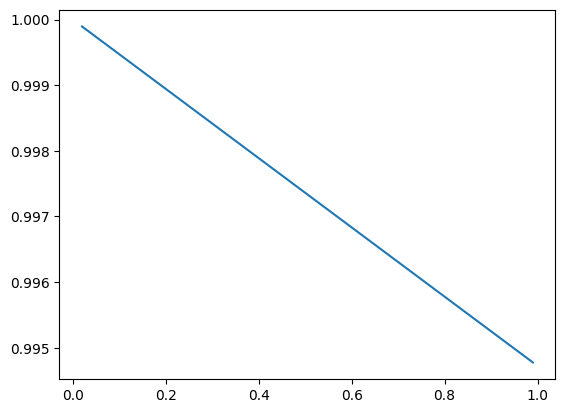

In [23]:
plt.plot(x, remcls, label = 'closeness')

In [24]:
for i in range(len(x)):
    remcmf[i] = (Z * (1 - (p_a2f * x[i])) + N * nadia_nprat(x[i], qs) * (1 - (n_a2f * x[i]))) / (Z + (N * nadia_nprat(x[i], qs)))

# from remc import remcls_c12_0p5, remcls_c12_0p75, remcls_c12_1p0, remcls_c12_1p25, remcls_c12_1p5
# from remc import remcls_c12_1p75, remcls_c12_2p0, remcls_c12_2p25, remcls_c12_2p5

# # plt.plot(x, remcls_c12_2p5, label = '2.5fm', color = 'cyan')
# # plt.plot(x, remcls_c12_2p25, label = '2.25fm', color = 'gold')
# # plt.plot(x, remcls_c12_2p0, label = '2fm', color = 'blue')
# # plt.plot(x, remcls_c12_1p75, label = '1.75fm', color = 'lightgreen')
# # plt.plot(x, remcls_c12_1p5, label = '1.5fm', color = 'red')
# # plt.plot(x, remcls_c12_1p25, label = '1.25fm', color = 'purple')
# plt.plot(x, remcls_c12_1p0, label = '1fm', color = 'maroon')
# # plt.plot(x, remcls_c12_0p75, label = '0.75fm', color = 'seagreen')
# # plt.plot(x, remcls_c12_0p5, label = '0.5fm', color = 'darkblue')

# from remc import remc_mf_c12, remc_mf_c12_1, remc_mf_c12_1p5, remc_mf_c12_1p75, remc_mf_c12_1p25, remc_mf_c12_0p25, remc_mf_c12_0p3, remc_mf_c12_0p4
# from remc import remc_mf_c12_0p5, remc_mf_c12_0p6, remc_mf_c12_0p7, remc_mf_c12_0p8, remc_mf_c12_0p9, remc_mf_c12_2p25, remc_mf_c12_2p5, remc_mf_c12_2p75
# from remc import remc_mf_c12_3p0
# # plt.plot(x, remcmf, label = fr'{mom_threshold}$fm^{-1}$', color = 'green')
# # plt.plot(x, remc_mf_c12_3p0, label = r'3.0$fm^{-1}$', color = 'darkorange')
# # plt.plot(x, remc_mf_c12_2p75, label = r'2.75$fm^{-1}$', color = 'gold')
# # plt.plot(x, remc_mf_c12_2p5, label = r'2.5$fm^{-1}$', color = 'magenta')
# # plt.plot(x, remc_mf_c12_2p25, label = r'2.25$fm^{-1}$', color = 'cyan')
# # plt.plot(x, remc_mf_c12, label = r'2$fm^{-1}$', color = 'blue')
# # plt.plot(x, remc_mf_c12_1p75, label = r'1.75$fm^{-1}$', color = 'lightgreen')
# # plt.plot(x, remc_mf_c12_1p5, label = r'1.5$fm^{-1}$', color = 'red')
# # plt.plot(x, remc_mf_c12_1p25, label = r'1.25$fm^{-1}$', color = 'purple')
# # plt.plot(x, remc_mf_c12_1, label = r'1$fm^{-1}$', color = 'maroon')
# # plt.plot(x, remc_mf_c12_0p9, label = r'0.9$fm^{-1}$', color = 'indianred')
# # plt.plot(x, remc_mf_c12_0p8, label = r'0.8$fm^{-1}$', color = 'orange')
# # plt.plot(x, remc_mf_c12_0p7, label = r'0.7$fm^{-1}$', color = 'yellow')
# # plt.plot(x, remc_mf_c12_0p6, label = r'0.6$fm^{-1}$', color = 'seagreen')
# # plt.plot(x, remc_mf_c12_0p5, label = r'0.5$fm^{-1}$', color = 'darkblue')
# # plt.plot(x, remc_mf_c12_0p4, label = r'0.4$fm^{-1}$', color = 'indigo')
# # plt.plot(x, remc_mf_c12_0p3, label = r'0.3$fm^{-1}$', color = 'violet')

# plt.xlabel('x')
# plt.ylabel('EMC Effect (closeness)')
# # plt.title(fr'A = {Z + N} and Z = {Z} for {target} at $Q^2$ = {qs} GeV$^2$')
# plt.title(fr'A = {Z + N} and Z = {Z} for {target}')
# plt.grid(alpha = 0.2)
# plt.legend()
# plt.yscale('log')
# plt.legend(loc = 'upper right', bbox_to_anchor = (1.3, 1.0))
# plt.savefig(f'plots/{target}_emc_{time.time():.0f}.pdf')

<h3 style="text-align: center; color: lightcyan"> Abhyuday's calculation (kinetic energy and density) </h3>

In [25]:
for i in range(len(x)):
    remcke[i] = (Z * (1 - fpke * x[i]) + N * nadia_nprat(x[i], qs) * (1 - fnke * x[i])) / (Z + N * nadia_nprat(x[i], qs))
    remcdens[i] = (Z * (1 - fpdens * x[i]) + N * nadia_nprat(x[i], qs) * (1 - fndens * x[i])) / (Z + N * nadia_nprat(x[i], qs))

<h2 style="text-align: center; color: yellow"> Fitting the line <h2>

Slope for h2 for closeness is 0.0053
Slope for h2 for momentum fraction is 0.0211
Slope for h2 for kinetic energy is 0.0010
Slope for h2 for density is 0.0760


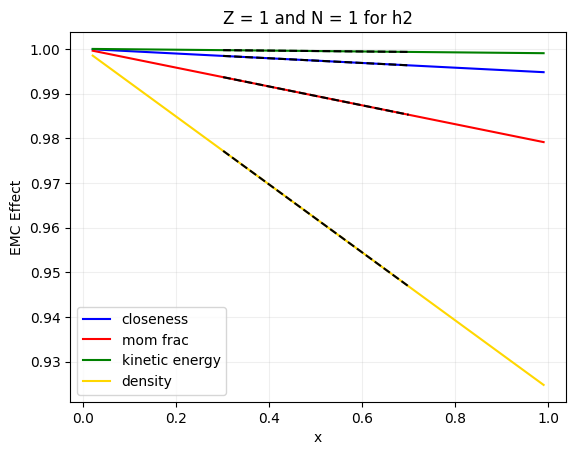

In [ ]:
fit_range = (x >= 0.3) & (x <= 0.7)
x_fit = x[fit_range]

fit_cls, slopecl = fitit(remcls, fit_range, x_fit)
fit_mf, slopemf = fitit(remcmf, fit_range, x_fit)
fit_ke, slopeke = fitit(remcke, fit_range, x_fit)
fit_dens, slopedens = fitit(remcdens, fit_range, x_fit)

fig, ax = plt.subplots()
# Plot the original data and the fit
ax.plot(x, remcls, label = 'closeness', color = 'blue')  # Original data
ax.plot(x, remcmf, label = 'mom frac', color = 'red')
ax.plot(x, remcke, label = 'kinetic energy', color = 'green')
ax.plot(x, remcdens, label = 'density', color = 'gold')
ax.plot(x_fit, fit_cls, color = 'black', linestyle = '--')  # Fitted line
ax.plot(x_fit, fit_mf, color = 'black', linestyle = '--')
ax.plot(x_fit, fit_ke, color = 'black', linestyle = '--')
ax.plot(x_fit, fit_dens, color = 'black', linestyle = '--')

# Add labels and legend
ax.set_xlabel('x')
ax.set_ylabel('EMC Effect')
ax.legend()
ax.grid(alpha = 0.2)
ax.title.set_text(f'Z = {Z} and N = {N} for {target}')

print(f'Slope for {target} for closeness is {slopecl:.4f}')
print(f'Slope for {target} for momentum fraction is {slopemf:.4f}')
print(f'Slope for {target} for kinetic energy is {slopeke:.4f}')
print(f'Slope for {target} for density is {slopedens:.4f}')
# fig.savefig(f'plots/{target}_emc_{time.time():.0f}.png', dpi = 300)

In [27]:
# with open('/Users/AbSir/Desktop/FlavaFlav/remc.py', 'a') as f:
#     uttar = str(input('Write this to file?'))
#     if uttar == 'y':
#         print('writing to file')
#         # f.write(f'remc_mf_{target}_{mom_threshold} = np.array({remcmf.tolist()})\n')
#         f.write(f'remcls_{target}_{dist} = np.array({remcls.tolist()})\n')
#     else:
#         print('नहीं लिखा')

In [ ]:
# Define the quantities to save in the specified order
data = [
    target,           # Target-1
    slopecl,          # Slope for closeness
    slopemf,          # Slope for momentum fraction
    slopeke,          # Slope for kinetic energy
    slopedens,        # Slope for density
    A,                # A-2
    Z,                # Z-3 (or change if actual A is different)
    N,                # N-4
    expectation_value,               # Average proton density-5
    expectation_value_n,             # Average neutron density-6
    fpdens,                          # Average density of nucleons sampled by protons-7
    fndens,                          # Average density of nucleons sampled by neutrons-8
    density_excluded,                # Excluding scattered protons-9
    density_excluded_n,              # Excluding scattered neutrons-10
    dist,                            # Distance (dist)-11
    P_pn,                            # Probability of neutron within dist fm of proton-12
    P_pp,                            # Probability of proton within dist fm of proton-13
    P_nn,                            # Probability of neutron within dist fm of neutron-14
    mom_threshold,                   # Momentum threshold-15
    p_a2f,                           # Fraction of protons above momentum threshold-16
    n_a2f,                           # Fraction of neutrons above momentum threshold-17
    fpke,                            # Proton kinetic energy-18
    deno_momentum,                   # Proton normalization-19
    fnke,                            # Neutron kinetic energy-20
    deno_momentum,                   # Neutron normalization-21
    fpclose,                         # fpclose-22
    fnclose,                         # fnclose-23
    fpke,                            # Fpke-24
    fnke                             # fnke-25
]

# Write the data to a file with each value separated by \t
uttar = 'n'
# uttar = str(input('Write this to file?'))
if uttar == 'y':
    with open("fullsummaryfile.txt", "a") as file:
        file.write("\t".join(str(value) for value in data))
        file.write("\n")
    print("Data has been written in a single line.")

# ------------------------------------------------------------------------------------------------- #